In [29]:
'''You have an unfair coin with p(H) = p. You toss the coin n times and note the number of heads obtained. 
What is the probability that the number of heads would be an even number? '''
import random
def coin_toss():
    if random.random() <= 0.5:
        return 0
    return 1

def probability(n,p):
    heads = 0
    for i in range(n):
        if coin_toss() == 1:
            heads += 1
    return heads

#n - no of coint tosses at each trial of experiment , p = probabilty of heads , experiment is performed 10 times
def experiment(n,p):
    heads = 0
    toss = [] #contains no of heads in n coin tosses
    phe = 0
    for i in range(10):
        heads = probability(n,p)
        toss.append(heads)
        if(heads%2==0):
            phe += 1
    print(toss)
    return phe/10

In [30]:
experiment(100,0.7)

[54, 52, 39, 57, 51, 42, 40, 48, 53, 53]


0.5

In [31]:
# pn = (1+(1-2p)**n)/2
# pn = probability of getting even heads after n coint tosses , p = probabilty of getting a head

def exact_probabilty(n,p):
    return (1+(1-2*p)**n)/2

In [32]:
exact_probabilty(100,0.7)

0.5

In [38]:
#dp approach
#p(H) = p, p(T) = 1-p
#p(n) - probabilty of getting even number of heads in n tosses
#p(n) = p(H)*p(En|H) + p(T)*p(En|T) = p(H) * (1- p(n-1)) + p(T) * (p(n-1)) = p + p(n-1) * (1-2p)
#p(0) = 1, p(1) = p+p(0)*(1-2p) = 1-p, p(2) = p+p(1)(1-2p)
#p(n-1) - probabilty of getting even heads in n-1 tosses
# 1- p(n-1) - probabilty of not getting even heads in n-1 tosses

def calc_probability(n,p):
    prob = {}
    prob[0] = 1 # we get 0 heads 
    prob[1] = 1-p
    
    if n in (0,1):
        return prob[n]
    
    for i in range (2,n+1):
        prob[i] = p + prob[i-1] * (1- (2 * p))
        
    return prob[n]

In [39]:
calc_probability(100,0.7)

0.5

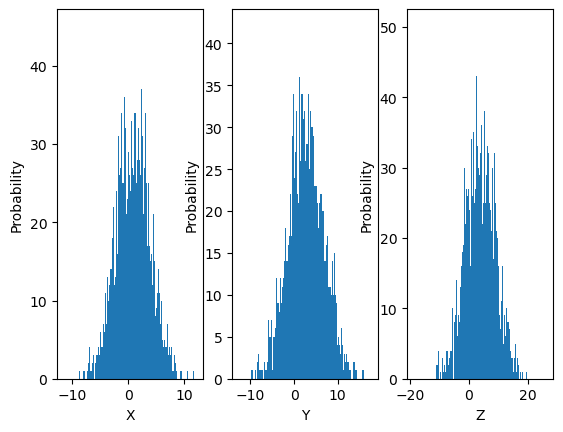

In [1]:
'''Generate 2 normal random variables, X~N(1,9) & Y~N(9,16) in Python. Then add X and Y to get Z. 
What is the distribution of Z? What does Z look like after plotting? Does the plot support theory?'''
import matplotlib.pyplot as plt
import numpy as np
x = np.random.normal(1,3,10000)
plt.subplot(1,3,1)
plt.xlabel('X')
plt.ylabel('Probability')
plt.hist(x, bins = 1000)

y = np.random.normal(3,4,10000)
plt.subplot(1,3,2)
plt.xlabel('Y')
plt.ylabel('Probability')
plt.hist(y, bins = 1000)

z= x+y
plt.subplot(1,3,3)
plt.xlabel('Z')
plt.ylabel('Probability')
plt.hist(z, bins = 1000)
plt.show()

In [42]:
'''A game of dice is begun by rolling an ordinary pair of dice. If the sum of the dice is 2, 3, or 12, 
the player loses. If it is 7 or 11, the player wins. If it is any other number i, the player continues to roll the 
dice until the sum is either 7 or i. If it is 7, the player loses; if it is i, the player wins. 
Let R denote the number of rolls of the dice in a game of craps. Find:
E[R]
E[R|player wins]
E[R|player loses]'''

import numpy as np
def dice_roll():
  dice1 = np.random.randint(1,7)
  dice2 = np.random.randint(1,7)
  return dice1+dice2

def trial():
    dice_rolls = []
    roll = dice_roll()
    #dice_rolls.append(roll)
    #result = (no of rolls, win = 1/ loss = 0)
    result = [1,0]
    if roll in [2,3,12]:
        #print('Loss ' + str(dice_rolls))
        return [1,0]
    elif roll in [7,11]:
        #print('Win ' + str(dice_rolls))
        return [1,1]
    else:
        i = dice_roll()
        result[0] += 1
        #dice_rolls.append(i)
        while (i != roll and i != 7):
            i = dice_roll()
            result[0] += 1
            #dice_rolls.append(i)
        if i == 7:
            result[1] = 0
        elif i == roll:
            result[1] = 1
        #print(dice_rolls)
        return result
    
def experiment(n):
    wins = losses = win_rolls = loss_rolls = 0
    for i in range(n):
        result = trial()
        if result[1] == 0:
            loss_rolls += result[0]
            losses += 1
        elif result[1] == 1:
            win_rolls += result[0]
            wins += 1
    #E(R) = E(Rolls|Player Wins) * P(Win) + E(Rolls|Player Loses) * P(Loss)
    return (loss_rolls * (losses / n) + win_rolls * (wins / n))

In [80]:
'''Mark was the first to arrive at a 100-seat theatre. He forgot his seat number and picked a random seat for himself. 
After this, every single person who gets to the theatre sits on his/her seat if it is available, and chooses any 
available seat at random. John was last to enter the theatre and 99 seats were occupied. 
What's the probability that John gets to sit in his own seat? Can we write a simulation to verify the result?'''

import numpy as np
def simulation(seats,niter):
    counter = 0
    for i in range(niter):
        #unoccupied seats
        seat_occupied = [False] * seats
        #rabdomly selected seat by mark
        random_seat = np.random.randint(0,seats)
        seat_occupied[random_seat] = True
        for i in range(seats-2):
            if seat_occupied[i] is False :
                seat_occupied[i] = True
            else:
                unoccupied_seats = [i[0] for i in enumerate(seat_occupied) if i[1] is False]
                random_seat = np.random.choice(unoccupied_seats)
                seat_occupied[random_seat] = True
        if not seat_occupied[-1]:
            counter += 1
    return counter/niter  

In [92]:
simulation(100, 10000)

0.494